<a href="https://colab.research.google.com/github/SARA3SAEED/DA-Mu/blob/main/s07c_data_reshaping_and_pivoting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADVANCED PANDAS: DATA RESHAPING & PIVOTING

## Course Outline:
- Introduction to Data Wrangling
    - Case-study: Data Preprocessing for The Absolute Beginners
- Data Cleaning & Preparation
    - Data Cleaning (Missing & Duplicated Data)
    - String Manipulation (Regular Expression)
    - Data Transformation
- Merging, Joining, and Concatenating Data
    - concat()
    - merge()
    - join()
- Aggregation and Grouping
    - groupby()
- ***Reshaping and Pivoting***
    - ***pivot_table()***
    - ***melt()***

##### Importing Libraries & Datasets

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [22]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


==========

# Reshaping & Pivoting

## Reshaping Data
- Why?
    - Tidy datasets
    - Readability (Human vs. Statistics)
    - Simplicity
    - Summary Statistics for Multi-Level Indexing
- What?
    - Wide vs. Long Format
- Transformation
    - Long to Wide Using *pivot() & pivot_table()* Functions
    - Wide to Long Using *melt()* Function

##### Long-to-Wide Transformation Example

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


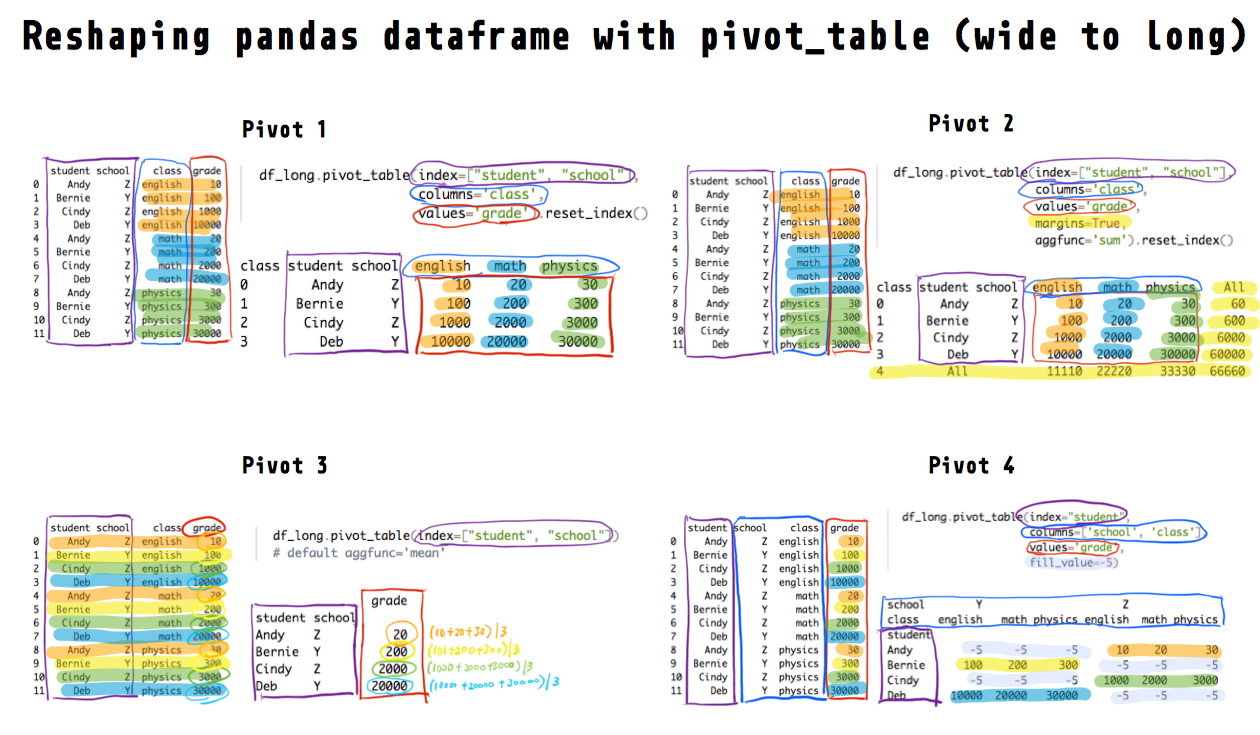

In [13]:
from IPython.display import Image
Image("/content/drive/MyDrive/DA-Mu/s18/preprocessing-materials/imgs/pivot-example.png")

##### Wide-to-Long Transformation Example

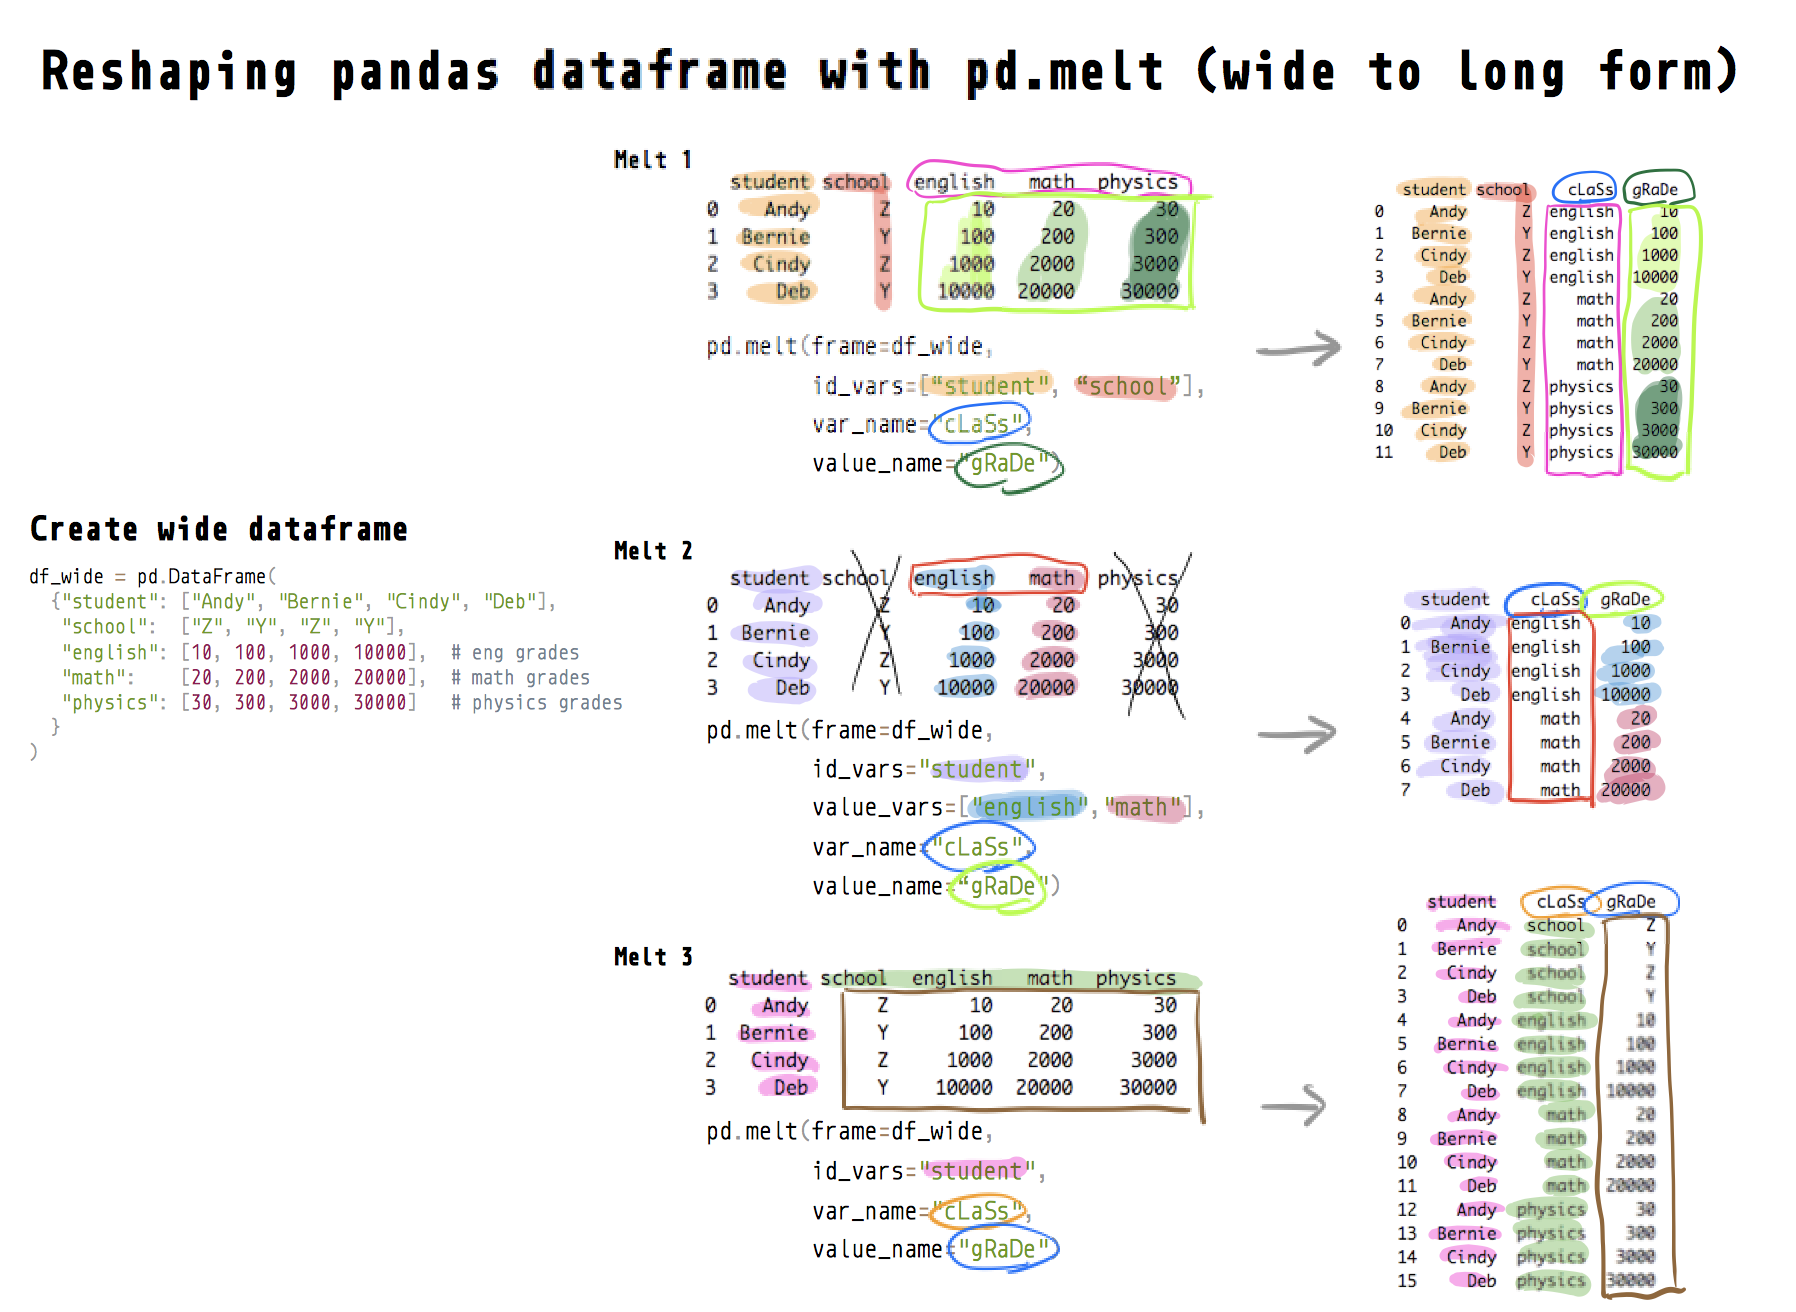

In [14]:
from IPython.display import Image
Image("/content/drive/MyDrive/DA-Mu/s18/preprocessing-materials/imgs/melt-example.png")

==========

### Wide-to-Long Transformation

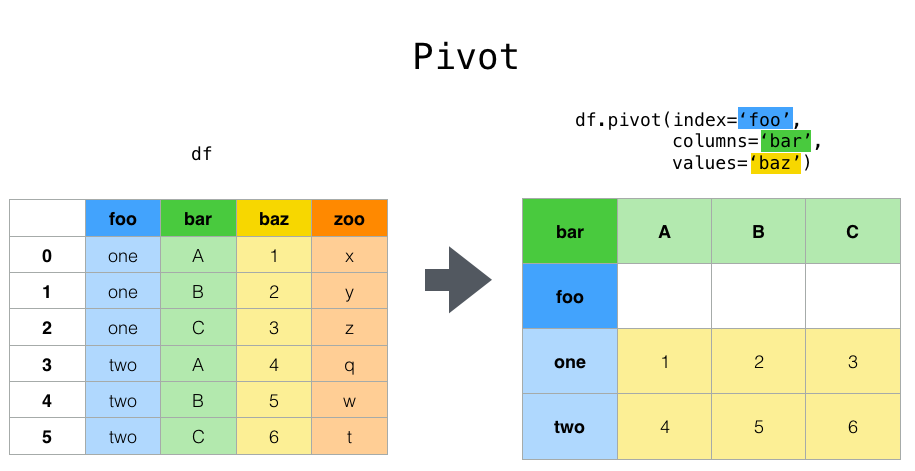

In [15]:
from IPython.display import Image
Image("/content/drive/MyDrive/DA-Mu/s18/preprocessing-materials/imgs/pivot.png")

##### Rashaping with pivot() function

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
duplicates = titanic.duplicated(subset=['sex', 'pclass'], keep=False)
print(titanic[duplicates])

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [26]:
pd.pivot(titanic, index='sex', columns='pclass',values='fare') #show error step 1, povit
# pivot() function has some limitation

In [24]:
pd.pivot_table(titanic, index='sex', columns='pclass', values='fare', aggfunc='mean') # step 2 right one, povit table


pclass,1,2,3
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


##### Reshaping with pivot_table()
pivot() method has limitations when dealing with aggregation functions and duplicated data, so we will use pivot_table() instead

In [35]:
# Grouping data using index in a Pivot Table
pd.pivot_table(data=titanic,index=['sex'])

#titanic.pivot_table('sex')
# titanic.groupby('sex').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [28]:
# Pivot Table with multi-index
pd.pivot_table(titanic,index=['sex','pclass'])

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Aggregation function in Pivot Tables
pd.pivot_table(titanic,index=['sex','pclass'],aggfunc={'age':np.mean,'survived':np.sum})

In [ ]:
pd.pivot_table(titanic,index=['sex','pclass'],values=['survived'], aggfunc=np.sum, margins=True)

In [ ]:
pd.pivot_table(titanic,index=['sex'],columns=['pclass'],values=['survived'],aggfunc=np.sum)

In [29]:
pd.pivot_table(titanic,
               index=['sex','survived','pclass'],
               columns=['embark_town'],
               values=['age'],
               aggfunc=np.mean,
               fill_value=np.mean(titanic['age']),
               margins=True)

<ipython-input-29-8e415e7765e1>:1: FutureWarning: The provided callable <function mean at 0x7af4f4d33d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(titanic,
<ipython-input-29-8e415e7765e1>:1: FutureWarning: The provided callable <function mean at 0x7af4f4d33d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(titanic,
<ipython-input-29-8e415e7765e1>:1: FutureWarning: The provided callable <function mean at 0x7af4f4d33d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(titanic,


age                                  
embark_town             Cherbourg Queenstown Southampton        All
sex    survived pclass                                             
female 0        1       50.000000  29.699118   13.500000  25.666667
                2       29.699118  29.699118   36.000000  36.000000
                3       20.700000  28.100000   23.688889  23.818182
       1        1       35.675676  33.000000   33.619048  34.562500
                2       19.142857  30.000000   29.091667  28.080882
                3       11.045455  17.600000   22.548387  19.329787
male   0        1       43.050000  44.000000   45.362500  44.581967
                2       29.500000  57.000000   33.414474  33.369048
                3       27.555556  28.076923   27.168478  27.255814
       1        1       36.437500  29.699118   36.121667  36.248000
                2        1.000000  29.699118   17.095000  16.022000
                3       18.488571  29.000000   22.933333  22.274211
All                     30.814769  28.089286   29.445397  29.642093

==========

### Long-to-Wide Transformation

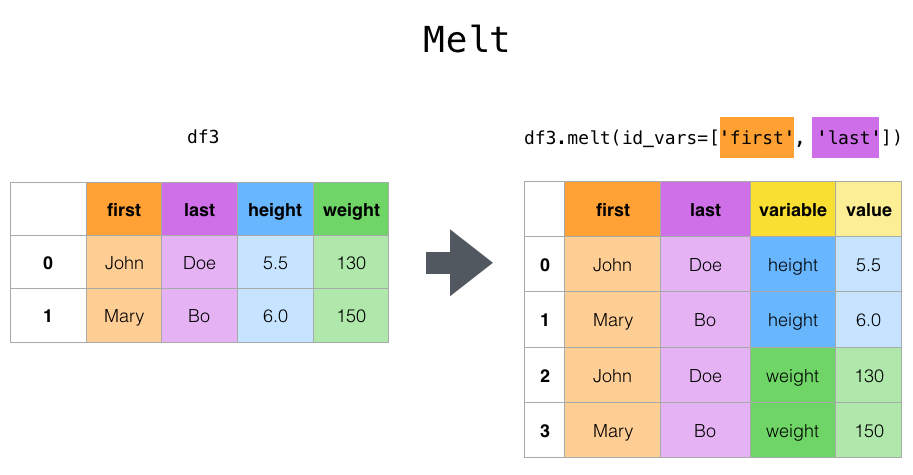

In [36]:
from IPython.display import Image
Image("/content/drive/MyDrive/DA-Mu/s18/preprocessing-materials/imgs/melt.png")

##### Undoing Pivoting Using melt() function

In [38]:
df = pd.DataFrame({'first': {0: 'John', 1: 'Mary'},
                   'last': {0: 'Doe', 1: 'Bo'},
                   'height': {0: 5.5, 1: 6.0},
                  'weight':{0: 120, 1: 135}})
df

,first,last,height,weight
0,John,Doe,5.5,120
1,Mary,Bo,6.0,135


In [39]:
df.melt(id_vars=['first','last'], value_vars=['height','weight'],var_name='W/H',value_name='Results')

,first,last,W/H,Results
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,120.0
3,Mary,Bo,weight,135.0


==========

### Stacking & UnStacking

##### Reshaping Using stack() and unstack() functions Using Multi-Indexing

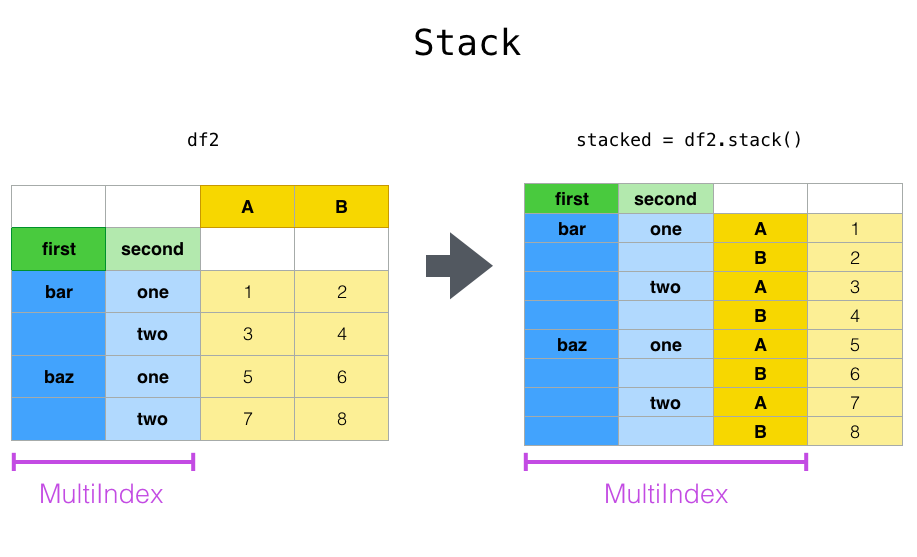

In [40]:
from IPython.display import Image
Image("/content/drive/MyDrive/DA-Mu/s18/preprocessing-materials/imgs/stack.png")

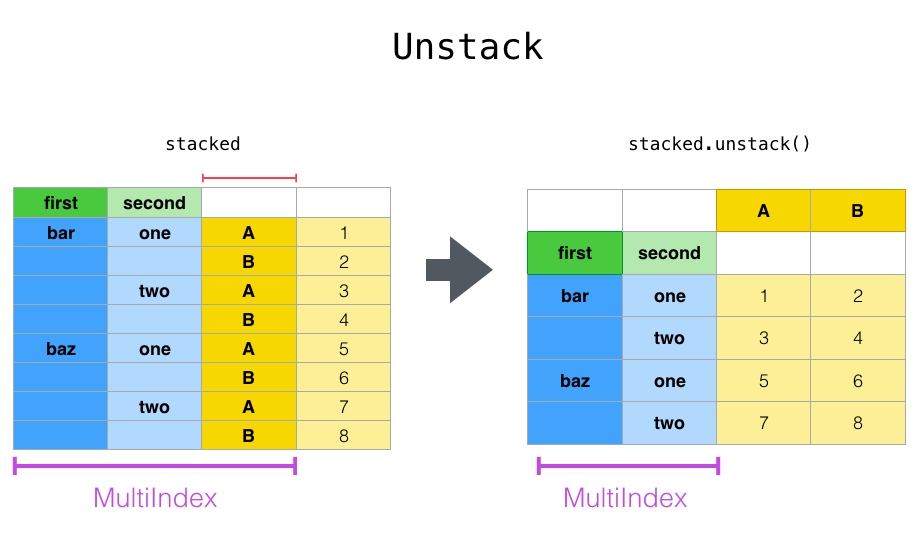

In [41]:
from IPython.display import Image
Image("/content/drive/MyDrive/DA-Mu/s18/preprocessing-materials/imgs/unstack.png")

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
# Multi-Indexing
titanic.set_index(['sex','pclass'])['fare']

sex     pclass
male    3          7.2500
female  1         71.2833
        3          7.9250
        1         53.1000
male    3          8.0500
                   ...   
        2         13.0000
female  1         30.0000
        3         23.4500
male    1         30.0000
        3          7.7500
Name: fare, Length: 891, dtype: float64

In [44]:
titanic.set_index(['sex','pclass'])['fare'].index

MultiIndex([(  'male', 3),
            ('female', 1),
            ('female', 3),
            ('female', 1),
            (  'male', 3),
            (  'male', 3),
            (  'male', 1),
            (  'male', 3),
            ('female', 3),
            ('female', 2),
            ...
            (  'male', 3),
            ('female', 3),
            (  'male', 2),
            (  'male', 3),
            ('female', 3),
            (  'male', 2),
            ('female', 1),
            ('female', 3),
            (  'male', 1),
            (  'male', 3)],
           names=['sex', 'pclass'], length=891)

In [45]:
titanic_pivoted = titanic.pivot_table(index='sex', columns='pclass', values='fare')
titanic_pivoted

# titanic.groupby(['sex','pclass'])['fare'].mean().unstack()

pclass,1,2,3
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [46]:
titanic_pivoted.stack()

sex     pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
dtype: float64

In [47]:
titanic_pivoted.unstack()

pclass  sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
dtype: float64

In [48]:
titanic_gender = titanic.groupby('sex').sum()
titanic_gender

TypeError: category type does not support sum operations

In [49]:
titanic_gender.unstack()

NameError: name 'titanic_gender' is not defined

In [ ]:
titanic_gender.stack()

==========

# THANK YOU!